In [1]:
# variables
DATA_PATH = 'data/raw/'
RESULT_PATH = 'results/cabam/'

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import scipy.sparse as sp
from collections import Counter
import logging
from tqdm.notebook import tqdm
import powerlaw
import pickle
import os

from methods.cabam.graph_preprocessing_utils import *
from methods.cabam.graph_summary_utils import *
from methods.cabam.cabam_utils import *

import utils.project_utils as p_utils

In [3]:
def cabam_load_data(dataset='polblogs'):
  """
  Loads data from .npz formatted file


  A -- Adjacency
  H -- Features
  y -- Labels
  G -- Networkx graph
  c -- Number of classes
  assortativity -- overall assortativity statistic
  """

  A, H, y, G = produce_processed_data(dataset, DATA_PATH)

  # summary info of the dataset
  dataset_summary(A, H)
  c = len(np.unique(y))
  print(f'Number of classes: {c}')

  assortativity = overall_label_assortativity(G, y)

  return A, H, y, G, c, assortativity

In [4]:
def cabam_plot_summary(A, y, G, c, dataset_name):
  # generate boxplot of assortativity vs. degree
  degs, assortativities = plot_degree_label_assortativity(G, y, bins=10, dataset=dataset_name)

  # generate overall assortativity statistic
  assortativity = overall_label_assortativity(G, y)

  # plot node-level assortativity
  plot_node_level_assortativity(G, y, dataset=dataset_name)

  # plot degree distribution
  plot_degree_distribution(A, dataset=dataset_name)

  # plot label homophily varying over degrees
  plot_degree_label_assortativity(G, y)

In [5]:
def cabam_generate_graph(c, n, p_c):
  """
  Generates a graph structure with labels using cabam generator


  c -- number of classes in the original graph
  n -- number of nodes desired
  p_c -- constant setting for fixed assortativity constant p_c throughout the graph
  """

  native_probs = [1/c for _ in range(c)]
  constant_c_probs = {1: p_c, 0: 1 - p_c}

  # each node added connects to m other nodes
  m = 10

  G, node_degrees, node_labels, intra_class, inter_class, ratio_tracker, alpha_tracker = cabam_graph_generation(n=n, 
                                                                                                              m=m, 
                                                                                                              c=c, 
                                                                                                              native_probs=native_probs,
                                                                                                              c_probs=constant_c_probs)
  
  return G, node_labels
  

In [6]:
def cabam_generate_features(c, G, y):
  # Class-conditional feature generation
  feature_means = np.eye(c)
  node_features = []
  for n_id, c_id in zip(range(len(G)), y):
      f = np.random.multivariate_normal(mean=feature_means[c_id, :],
                                        cov=feature_means,
                                        size=1)
      node_features.append(f.ravel())

  node_features = np.array(node_features)

  print('Generated feature matrix of shape:', node_features.shape)
  return node_features

In [7]:
for dataset in ['polblogs', 'citeseer', 'cora', 'cora_ml', 'pubmed']:

    # load data
    A, H, y, G, c, assortativity = cabam_load_data(dataset)

    # plot initial graph summary
    #cabam_plot_summary(A, y, G, c, dataset)

    # generate topology
    G_new, y_new = cabam_generate_graph(c, 3000, assortativity)

    # generate features
    H_new = cabam_generate_features(c, G_new, y_new)

    # plot generated graph summary
    #cabam_plot_summary(nx.to_numpy_array(G_new), y_new, G_new, c, f'{dataset} generated')

    # Save the results
    p_utils.save_graph(G_new, RESULT_PATH + f'{dataset}/', 'G.csv')
    p_utils.save_fetures(H_new, RESULT_PATH + f'{dataset}/', 'Features.csv')

Loading dataset polblogs
Nodes:  1490
Edges:  35050
Features:  2
Number of classes: 2
Overall assortativity: 0.9134853062345509
/Users/andrejantonov/opt/anaconda3/lib/python3.8/site-packages/scipy/sparse/_index.py:124: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


INFO:root:Theor. edge prob to deg k: [0.833 0.705 0.604 0.524 0.458 0.404 0.359 0.322 0.289 0.262]
INFO:root:Empir. edge prob to deg k: [0.85  0.671 0.657 0.588 0.48  0.414 0.34  0.321 0.303 0.294]
INFO:root:Snapshot: (4418/4910)=0.900	 Overall: 0.900
INFO:root:Max node degree: 89
INFO:root:Theor. edge prob to deg k: [0.833 0.705 0.604 0.524 0.458 0.404 0.359 0.322 0.289 0.262]
INFO:root:Empir. edge prob to deg k: [0.815 0.678 0.632 0.545 0.462 0.423 0.352 0.33  0.316 0.291]
INFO:root:Snapshot: (4533/5000)=0.907	 Overall: 0.903
INFO:root:Max node degree: 126
INFO:root:Theor. edge prob to deg k: [0.833 0.705 0.604 0.524 0.458 0.404 0.359 0.322 0.289 0.262]
INFO:root:Empir. edge prob to deg k: [0.81  0.688 0.626 0.543 0.443 0.4   0.359 0.326 0.305 0.279]
INFO:root:Snapshot: (4549/5000)=0.910	 Overall: 0.905
INFO:root:Max node degree: 148
INFO:root:Theor. edge prob to deg k: [0.833 0.705 0.604 0.524 0.458 0.404 0.359 0.322 0.289 0.262]
INFO:root:Empir. edge prob to deg k: [0.814 0.696 0.6

INFO:root:Theor. edge prob to deg k: [0.833 0.705 0.604 0.524 0.458 0.404 0.359 0.322 0.289 0.262]
INFO:root:Empir. edge prob to deg k: [0.802 0.683 0.596 0.527 0.467 0.426 0.407 0.331 0.331 0.322]
INFO:root:Snapshot: (3978/4910)=0.810	 Overall: 0.810
INFO:root:Max node degree: 85
INFO:root:Theor. edge prob to deg k: [0.833 0.705 0.604 0.524 0.458 0.404 0.359 0.322 0.289 0.262]
INFO:root:Empir. edge prob to deg k: [0.805 0.68  0.572 0.532 0.464 0.413 0.402 0.318 0.298 0.298]
INFO:root:Snapshot: (4372/5000)=0.874	 Overall: 0.843
INFO:root:Max node degree: 116
INFO:root:Theor. edge prob to deg k: [0.833 0.705 0.604 0.524 0.458 0.404 0.359 0.322 0.289 0.262]
INFO:root:Empir. edge prob to deg k: [0.814 0.681 0.573 0.505 0.467 0.416 0.384 0.326 0.286 0.29 ]
INFO:root:Snapshot: (4319/5000)=0.864	 Overall: 0.850
INFO:root:Max node degree: 125
INFO:root:Theor. edge prob to deg k: [0.833 0.705 0.604 0.524 0.458 0.404 0.359 0.322 0.289 0.262]
INFO:root:Empir. edge prob to deg k: [0.813 0.685 0.5

INFO:root:Theor. edge prob to deg k: [0.833 0.705 0.604 0.524 0.458 0.404 0.359 0.322 0.289 0.262]
INFO:root:Empir. edge prob to deg k: [0.818 0.706 0.646 0.628 0.452 0.421 0.346 0.295 0.317 0.26 ]
INFO:root:Snapshot: (130/4910)=0.026	 Overall: 0.026
INFO:root:Max node degree: 123
INFO:root:Theor. edge prob to deg k: [0.833 0.705 0.604 0.524 0.458 0.404 0.359 0.322 0.289 0.262]
INFO:root:Empir. edge prob to deg k: [0.84  0.695 0.625 0.563 0.451 0.406 0.355 0.301 0.299 0.273]
INFO:root:Snapshot: (157/5000)=0.031	 Overall: 0.029
INFO:root:Max node degree: 178
INFO:root:Theor. edge prob to deg k: [0.833 0.705 0.604 0.524 0.458 0.404 0.359 0.322 0.289 0.262]
INFO:root:Empir. edge prob to deg k: [0.866 0.69  0.621 0.553 0.439 0.386 0.345 0.309 0.29  0.267]
INFO:root:Snapshot: (149/5000)=0.030	 Overall: 0.029
INFO:root:Max node degree: 206
INFO:root:Theor. edge prob to deg k: [0.833 0.705 0.604 0.524 0.458 0.404 0.359 0.322 0.289 0.262]
INFO:root:Empir. edge prob to deg k: [0.873 0.695 0.611

INFO:root:Theor. edge prob to deg k: [0.833 0.705 0.604 0.524 0.458 0.404 0.359 0.322 0.289 0.262]
INFO:root:Empir. edge prob to deg k: [0.814 0.733 0.589 0.489 0.438 0.471 0.396 0.333 0.336 0.272]
INFO:root:Snapshot: (2141/4910)=0.436	 Overall: 0.436
INFO:root:Max node degree: 116
INFO:root:Theor. edge prob to deg k: [0.833 0.705 0.604 0.524 0.458 0.404 0.359 0.322 0.289 0.262]
INFO:root:Empir. edge prob to deg k: [0.851 0.715 0.618 0.5   0.439 0.413 0.347 0.297 0.293 0.262]
INFO:root:Snapshot: (2336/5000)=0.467	 Overall: 0.452
INFO:root:Max node degree: 155
INFO:root:Theor. edge prob to deg k: [0.833 0.705 0.604 0.524 0.458 0.404 0.359 0.322 0.289 0.262]
INFO:root:Empir. edge prob to deg k: [0.841 0.71  0.63  0.545 0.427 0.407 0.344 0.303 0.286 0.247]
INFO:root:Snapshot: (2402/5000)=0.480	 Overall: 0.461
INFO:root:Max node degree: 179
INFO:root:Theor. edge prob to deg k: [0.833 0.705 0.604 0.524 0.458 0.404 0.359 0.322 0.289 0.262]
INFO:root:Empir. edge prob to deg k: [0.84  0.698 0.

INFO:root:Theor. edge prob to deg k: [0.833 0.705 0.604 0.524 0.458 0.404 0.359 0.322 0.289 0.262]
INFO:root:Empir. edge prob to deg k: [0.812 0.76  0.617 0.585 0.483 0.385 0.382 0.346 0.304 0.24 ]
INFO:root:Snapshot: (3618/4910)=0.737	 Overall: 0.737
INFO:root:Max node degree: 92
INFO:root:Theor. edge prob to deg k: [0.833 0.705 0.604 0.524 0.458 0.404 0.359 0.322 0.289 0.262]
INFO:root:Empir. edge prob to deg k: [0.807 0.729 0.604 0.555 0.46  0.383 0.377 0.348 0.329 0.274]
INFO:root:Snapshot: (3800/5000)=0.760	 Overall: 0.749
INFO:root:Max node degree: 125
INFO:root:Theor. edge prob to deg k: [0.833 0.705 0.604 0.524 0.458 0.404 0.359 0.322 0.289 0.262]
INFO:root:Empir. edge prob to deg k: [0.814 0.735 0.583 0.547 0.446 0.392 0.372 0.328 0.294 0.265]
INFO:root:Snapshot: (3793/5000)=0.759	 Overall: 0.752
INFO:root:Max node degree: 153
INFO:root:Theor. edge prob to deg k: [0.833 0.705 0.604 0.524 0.458 0.404 0.359 0.322 0.289 0.262]
INFO:root:Empir. edge prob to deg k: [0.82  0.727 0.5

In [8]:
tree = nx.read_adjlist('data/synthetic/tree.csv')
y_tree = [0, 1, 1, 1, 2, 2, 2, 2, 2, 2]
A_tree = nx.to_numpy_array(tree)
c_tree = 3
probs_tree = [2/3, 1/6, 1/6]

In [9]:
cabam_plot_summary(A_tree, y_tree, tree, 3, 'Tree')

[nan nan nan nan nan nan nan nan nan  1.]
nan
/Users/andrejantonov/Google Диск/Учеба/НИР, Антонов Андрей, J4133c/Experiments/methods/cabam/graph_summary_utils.py:28: RuntimeWarning: invalid value encountered in double_scalars
  assortativity = np.sum(neighbor_labels) / len(neighbor_labels)
/Users/andrejantonov/Google Диск/Учеба/НИР, Антонов Андрей, J4133c/Experiments/methods/cabam/graph_summary_utils.py:37: RuntimeWarning: divide by zero encountered in log10
  deg_bins = np.logspace(np.log10(min(degs)), np.log10(max(degs)+1), bins)
/Users/andrejantonov/opt/anaconda3/lib/python3.8/site-packages/numpy/core/function_base.py:144: RuntimeWarning: invalid value encountered in multiply
  y *= step
/Users/andrejantonov/opt/anaconda3/lib/python3.8/site-packages/numpy/core/function_base.py:154: RuntimeWarning: invalid value encountered in add
  y += start


ValueError: cannot convert float NaN to integer

In [52]:
# generate topology
tree_new, y_tree_new = cabam_generate_graph(c_tree, 10, 0.9)

{0: 'red', 1: 'green', 2: 'blue', 3: 'yellow', 4: 'purple', 5: 'black', 6: 'orange'}


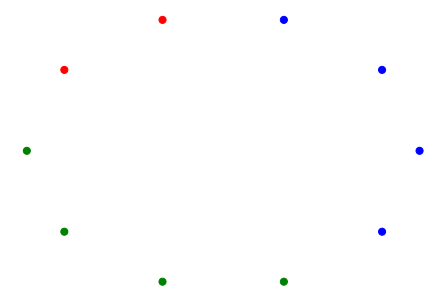

In [53]:
draw_network_with_labels(tree_new, y_tree_new)